<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%207/MIS710_Lab_7_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lecture 7: Introduction to Artificial Neural Networks**

Author: Associate Professor Lemai Nguyen

Objectives:

* To learn to build and test ANN models for classification and regression
* To evaluate the models based on the ML problem


**Loading basic Libraries**




In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [ ]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt


# **1. Case One: Biopsy**

**Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable. 

**Approaches**: ANN using schikit learn MLP Classifier and Keras

**Dataset**: 
V1, V2, V7-V9: biological variables
Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients 


## **1.1 Loading Data**


1.   Load the dataset
2.   Explore the data



In [ ]:
# load dataset
records = pd.read_csv('https://raw.githubusercontent.com/VanLan0/MIS710/main/biopsy_ln.csv')
print(records)

## **1.2 Inspecting and cleansing data**

In [ ]:
#Print a sample of 10 datapoints; hint: use the function sample()


In [ ]:
#display variables and data types


In [ ]:
#Inspect missing data


In [ ]:
print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 

In [ ]:
#drop an irrelevant variable(s), then display the remaining variables abd data types

records.info()

## **1.3 EDA**
1. Explore descriptive stats and histograms of continuous variables
2. Explore descriptive stats and barcharts of categorical variables
3. Explore relationships among the variables using heatmaps
4. Explore logistric regression relationships between variables 

Convert data as needed for the exploration tasks

**univariable analyses**

In [ ]:
#generate descriptive stats for numerical variables


In [ ]:
#create a stats for each variable and display it histograms for 
for i in records.iloc[:,:]: 
    print('Exploring :', i, '\n', records[i].describe())
    plt.hist(records[i])
    plt.title(i)
    plt.show()

In [ ]:
#create barchats for disgnosis

plt.show()

In [ ]:
#create frequency stats for diagnosis


**multi-variable analyses**

In [ ]:
# complete the for loop below to generate the following boxplots - hint: data=records, x=i, y='diagnosis'
for i in records.columns[1:5]:
  
  plt.show()

In [ ]:
#generate a heatmap

## **1.4 Data preparation and feature selection**

In [ ]:
#convert categorical data to numerical 
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0
       
records['diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

In [ ]:
#generate heatmaps to explore relationships
sns.heatmap(records.corr(), cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot=True)
plt.show()

What can you observe in all the above analyses?

### **Save file for future analyses**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import io

In [ ]:
try:
    # save the DataFrame to a CSV file
    records.to_csv('/content/drive/My Drive/Colab Notebooks/MIS710/biopsy_processed.csv', index=False)
    print('File saved successfully!')
except Exception as e:
    print(f'An error occurred: {e}')
File saved successfully!

### **Feature Selection**

* Select predictors (attributes) for Classification
* Set role (Target)

In [ ]:
#Selecting predictors
features =['V1', 'V2', 'V7', 'V8', 'V9'] 

#complete the code below
X= records[features]
y= records['diagnosis']  # Target variable


## **1.5 Split the dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2023)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#how many cancer cases are in the training and test sets
print((y_train==1).sum())
print((y_test==1).sum())

**Normalise data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize data
scaler = StandardScaler()

# The following line of code normalises X_train
X_train_norm = scaler.fit_transform(X_train)

#Write your own code to normalise X_test

## **1.5 Initialise and Train a MLPClassifier for the classification problem**

Read about the MLP classifiers at:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 


In [ ]:
#import classes and functions
from sklearn.neural_network import MLPClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

**Your task: Train a neural network**

In [ ]:
# create an MLP classifier with 2 hidden layers - you can change the layers and sizes
ann_clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=2023, early_stopping=True)


In [ ]:
# complethe the code to fit the model with the training data, note you should use X_train_norm


## **1.6 Model evaluation**

**Your task: follow the instructions below**

In [ ]:
# use the classifier on the testing data to make predictions - think carefully which X you should use


In [ ]:
#get predicted probabilities for the main class
y_pred_probs = ann_clf.predict_proba(X_test_norm)
y_pred_probs = y_pred_probs[:, 1]

**Your task: Run and interpret the results below**

In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

In [ ]:
# Display confusion matrix
df_cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.show()

**Your task: Interpret the outcomes below**

In [ ]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, y_pred_probs)
auc_mlp=metrics.auc(fpr_mlp, tpr_mlp)
print('AUC:', '%.3f' % auc_mlp)

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()



In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, f'Probability: %5.3f':y_pred_probs})
inspection=pd.concat([X_test,inspection], axis=1)
inspection.sample(10)

## **1.7 A brief Intro to Keras**
scikit-learn's MLP and Keras are popular libraries for building and training artificial neural networks (ANNs) in Python. 

Scikit-learn's MLP has a simpler and more straightforward API compared to Keras. Keras has a more complex and flexible API, which allows you to build models using a variety of functional and sequential APIs.

Scikit-learn's MLP supports only fully connected feedforward neural networks. Keras supports a wider range of architectures including convolutional neural networks (CNNs), recurrent neural networks (RNNs), and more. Keras is built on top of TensorFlow, which allows you to use GPUs and TPUs for faster computation, especially when working with large datasets or complex models. 

Scikit-learn's MLP is designed to be easy to use, especially for beginners who are new to deep learning. Keras, on the other hand, requires more expertise and knowledge of deep learning concepts, but it provides more flexibility and control over the model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2023)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Standardize data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [ ]:
# Construct the ANN model structure
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_norm.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
early_stopping = EarlyStopping(patience=5, monitor='val_loss')
model.fit(X_train_norm, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


In [ ]:
# Predict test data labels
y_pred_probs = model.predict(X_test_norm)
y_pred = (y_pred_probs > 0.5)

In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
cm_keras=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:

# Display confusion matrix
df_cm = pd.DataFrame(cm_keras, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.show()

In [ ]:
#Calculate AUC for the keras model
fpr_keras, tpr_keras, thresholds = roc_curve(y_test, y_pred_probs_keras)
auc_keras=metrics.auc(fpr_keras, tpr_keras)
print('AUC:', '%.3f' % auc_keras)

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs_keras)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_keras)
plt.show()

## **1.8 Model comparison**

In [ ]:
# calculate performance metrics for ann_clf
accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred)

print('MLP Accuracy: ','%.2f' % accuracy_mlp)
print('MLP Precision: ', '%.2f' % precision_mlp)
print('MLP Recall: ',  '%.2f' % recall_mlp)
print('MLP F1 :',  '%.2f' % f1_mlp)

In [ ]:
#Write your own code to calculate performance metrics for the keras mlp and print them out

In [ ]:
#write our code to get fpr_mlp, tpr_mlp and fpr_keras, tpr_keras

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='scikit-learn MLP (AUC = %0.2f)' % auc_mlp)
plt.plot(fpr_keras, tpr_keras, color='navy', lw=2, label='Keras MLP (AUC = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('scikit-learn MLP AUC:','%.2f' %  auc_mlp)
print('Keras MLP AUC:', '%.2f' %auc_keras)

# **2. Case Two: Health insurance**

**MLP regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance 

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?



# **Using ANN for regression problems**

Read about MLP regressors at:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

## **2.1 Loadding data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'

In [ ]:
#loading data
records = pd.read_csv(url)
records.head()

## **2.2 Cleansing and preprocessing data**

In [ ]:
#Inspect missing data


In [ ]:
#Convert categorical variables to numerical using get dummies

print(records.info())


In [ ]:
records=records.rename(columns={'smoker_yes': 'smoker'})

## **2.3 EDA - Do it yourself**

## **2.4 Data Preparation Splitting**

### **Save file for future analyses**

Do it yourself
* mount google drive
* import io
* save the records data frame to Insurance_processed.csv

### **Feature selection**

In [ ]:
X=records.drop('charges', axis=1)
y=records['charges']

**Load libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Split the dataset into training and testing sets, use test_size=0.2, random_state=2023)

In [ ]:
# Normalize the X_train and X_norm data using StandardScaler
scaler = StandardScaler()


## **2.5 Initialise and Train a MLPRegressor for the regression problem**

In [ ]:
# Create an ANN model and fit it to the scaled training data
model = MLPRegressor(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=1000, random_state=2023)

#fit the model yourself
model.fit(X_train_norm, y_train)

## **2.6 Model Evaluation**

In [ ]:
# Use the trained model to predict on the normalised test data, hint: y_pred_mlp = 



In [ ]:
# Calculate RMSE, R-squared, and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2 = r2_score(y_test, y_pred_mlp)
mae = mean_absolute_error(y_test, y_pred_mlp)

# Print the evaluation metrics
print("RMSE: {:.3f}" .format(rmse))
print("R-squared: {:.3f}" .format(r2))
print("MAE: {:.3f}" .format(mae))

In [ ]:
records.charges.describe()

In [ ]:
#Plot residuals, i.e. the differences between the actual and predicted values. 
plt.hist(x=y_test-y_pred_mlp, bins=50)
plt.xlabel='error'
plt.ylabels='count'
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred, y_test-y_pred_mlp)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()

## **2.7 A Brief Intro to Keras (cont)**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

In [ ]:
X_train_norm.shape

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu', input_shape=(X_train_norm.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# fit the keras model on the dataset
history = History()
history=model.fit(X_train_norm, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[history])



In [ ]:
# make predictions using the model
y_pred_keras = model.predict(X_test_norm)

# calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_keras))
mae = mean_absolute_error(y_test, y_pred_keras)
r2 = r2_score(y_test, y_pred_keras)

print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('R-squared: {:.2f}'.format(r2))


In [ ]:
# plot the loss and accuracy over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Print the residuals
residuals = y_test - y_pred_keras.squeeze()


In [ ]:
#Plot residuals, i.e. the differences between the actual and predicted values. 
plt.hist(residuals, bins=50)
plt.xlabel='error'
plt.ylabels='count'
plt.show()

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_keras, residuals)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()

## **2.8 Model Comparison**

Compare the above two MPLRegressor and keras models 

In [ ]:
# Calculate the regression line for y_test and y_pred_mlp
slope_mlp, intercept_mlp = np.polyfit(y_test, y_pred_mlp, 1)
regression_line_mlp = slope_mlp * y_test + intercept_mlp

In [ ]:
#write your code to calculate the regression line for y_test and y_pred_keras

In [ ]:
# Create a scatter plot of true against predicted values for MLP and Keras
plt.scatter(y_test, y_pred_mlp)
plt.plot(y_test, regression_line_mlp, color='blue')
plt.scatter(y_test, y_pred_keras, marker='D', s=10, color='orange')
plt.plot(y_test, regression_line_keras, color='orange')
plt.title('true against predicted values for keras')
plt.ylabel('Predicted values')
plt.xlabel('True values')
plt.legend(loc="lower right")
plt.show()

# Image Recognition Using Convolutional Neural Networks

## Overview

In this project, you will learn how to build a convolutional neural network (CNN) to recognize images of different objects. You will use the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.



## Steps:

* Install the necessary libraries: TensorFlow, Keras, and NumPy.
* Load the CIFAR-10 dataset and preprocess the data.
* Define the CNN architecture, which should include convolutional layers, pooling layers, and fully connected layers.
* Compile the CNN model and train it using the training dataset.
* Evaluate the accuracy of the CNN model using the testing dataset.
* Use the trained model to make predictions on new images.

## Tips:

* Experiment with different CNN architectures to improve the accuracy of the model.
* Use data augmentation techniques to increase the size of the dataset and prevent overfitting.
* Visualize the filters learned by the convolutional layers to gain insights into what the model is learning.
* Use transfer learning to leverage pre-trained models and reduce the training time.


In [26]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


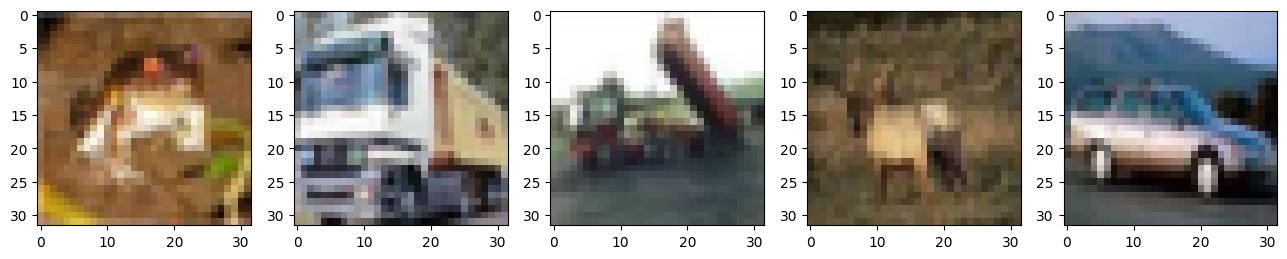

In [27]:
# Load the CIFAR-10 dataset and preprocess the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()


In [ ]:
# Normalize the inputs
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the outputs
num_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [20]:
# Define the CNN architecture

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [21]:
# Compile the CNN model and train it using the training dataset
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 6s 6ms/step - loss: 1.4841 - accuracy: 0.4629 - val_loss: 1.1377 - val_accuracy: 0.6017
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1239 - accuracy: 0.6045 - val_loss: 0.9820 - val_accuracy: 0.6574
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9716 - accuracy: 0.6614 - val_loss: 0.9024 - val_accuracy: 0.6841
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8710 - accuracy: 0.6971 - val_loss: 0.8590 - val_accuracy: 0.7006
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7988 - accuracy: 0.7200 - val_loss: 0.8040 - val_accuracy: 0.7205
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7229 - accuracy: 0.7469 - val_loss: 0.8170 - val_accuracy: 0.7234
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6715 - accuracy: 0.7652 - val_loss: 0.8059 - val_accuracy: 0.7239
Epoch 

In [22]:
# Evaluate the accuracy of the CNN model using the testing dataset
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 74.33%


In [29]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [30]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Define the MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1573376   
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [32]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128)


Epoch 1/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9635 - accuracy: 0.2999
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7963 - accuracy: 0.3671
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.7296 - accuracy: 0.3926
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.6806 - accuracy: 0.4098
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 1.6418 - accuracy: 0.4260
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 1.6104 - accuracy: 0.4366
Epoch 7/10
391/391 [==============================] - 2s 4ms/step - loss: 1.5837 - accuracy: 0.4438
Epoch 8/10
391/391 [==============================] - 2s 4ms/step - loss: 1.5579 - accuracy: 0.4543
Epoch 9/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5387 - accuracy: 0.4616
Epoch 10/10
391/391 [==============================] - 2s 4ms/step - loss: 1.5196 - accuracy: 0.4661

In [33]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 1.5523 - accuracy: 0.4520
Test accuracy: 0.4519999921321869


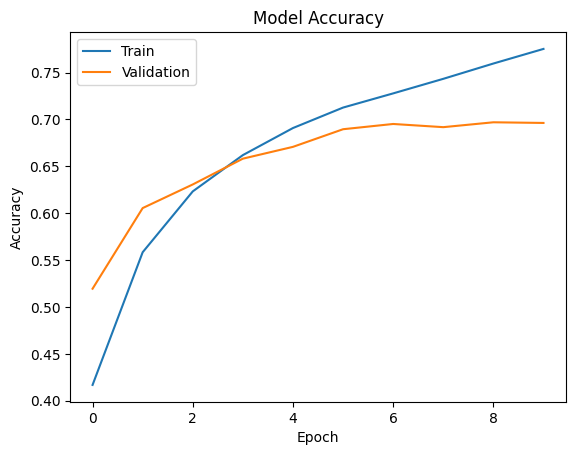

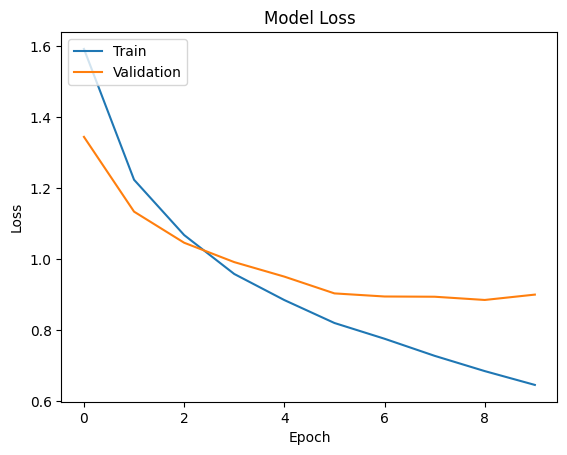

In [34]:
# Print out the training and validation performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


